In [ ]:
!pip install pystan==2.19.1.1
!pip install fbprophet

# Подключение библиотек

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# from fbprophet import Prophet

# Подгрузка данных

In [ ]:
def load_data(file_path):
    data = pd.read_csv(file_path)
    # Дополнительные операции с данными
    return data

# Функция для предсказания

In [ ]:
def make_forecast(data, model_type, forecast_period):
    # Дополнительные операции по подготовке данных и выбору модели
    p = 3
    d = 4
    q = 1 
    P = 2 
    D = 3 
    Q = 2 
    m =1
    if model_type == 'ARIMA':
        model = ARIMA(data, order=(p, d, q))
        forecast = model.fit().forecast(steps=forecast_period)
    elif model_type == 'SARIMA':
        model = SARIMAX(data, order=(p, d, q), seasonal_order=(P, D, Q, m))
        forecast = model.fit().forecast(steps=forecast_period)
    elif model_type == 'Prophet':
        model = Prophet()
        model.fit(data)
        future = model.make_future_dataframe(periods=forecast_period)
        forecast = model.predict(future)
        forecast = forecast.tail(forecast_period)['yhat'].values
    else:
        raise ValueError('Invalid model type')

    return forecast

# Визуализация

In [ ]:
def plot_forecast(data, forecast):
    plt.plot(data, label='Original Data')
    plt.plot(range(len(data), len(data) + len(forecast)), forecast, label='Forecast')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Сохранение резульатата

In [ ]:
def save_forecast(forecast, file_path):
    forecast_df = pd.DataFrame({'Forecast': forecast})
    forecast_df.to_csv(file_path, index=False)

# Генерация данных

In [ ]:
import pandas as pd
from datetime import datetime, timedelta

# Create a list of dates starting from a specific date
start_date = datetime(2023, 1, 1)
dates = [start_date + timedelta(days=i) for i in range(20)]

# Create a list of values
values = [10, 15, 12, 18, 20, 22, 23, 19, 22, 23, 23, 25, 26, 24, 23, 22, 22, 23, 23, 25]  # Add your 20 values here

# Create a DataFrame with the date and value columns
data = pd.DataFrame({'Date': dates, 'Value': values})

# Save DataFrame to CSV file
data.to_csv('data.csv', index=False)


In [ ]:
data

,Date,Value
0,2023-01-01,10
1,2023-01-02,15
2,2023-01-03,12
3,2023-01-04,18
4,2023-01-05,20
5,2023-01-06,22


# Выбор из моделей

In [ ]:
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Загрузка данных из файла
def load_data(file_path):
    data = pd.read_csv(file_path)
    return data

# Функция для оценки AR модели
def evaluate_ar_model(data):
    model = AutoReg(data, lags=1)
    model_fit = model.fit()
    forecast = model_fit.predict(start=len(data), end=len(data)+1)
    return forecast

# Функция для оценки ARIMA модели
def evaluate_arima_model(data):
    model = ARIMA(data, order=(1, 0, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    return forecast

# Функция для оценки SARIMA модели
def evaluate_sarima_model(data):
    model = SARIMAX(data, order=(1, 0, 0), seasonal_order=(0, 0, 0, 0))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=1)
    return forecast

# Загрузка данных
data = load_data('data.csv')
data_values = data['Value']

# Инициализация переменных для хранения наилучшей модели и оценки качества
best_model = None
best_score = float('inf')

# Оценка AR модели
ar_forecast = evaluate_ar_model(data_values)

In [ ]:
data_values[7:9]

7    19
8    22
Name: Value, dtype: int64

In [ ]:
ar_forecast

20    24.384394
21    23.974220
dtype: float64

In [ ]:
ar_score = mean_squared_error(data_values[1:3], ar_forecast)

# Сохранение AR модели, если она лучше текущей наилучшей модели
if ar_score < best_score:
    best_model = 'AR'
    best_score = ar_score

# Оценка ARIMA модели
arima_forecast = evaluate_arima_model(data_values)

In [ ]:
arima_forecast

20    24.416954
dtype: float64

In [ ]:
arima_score = mean_squared_error(data_values[8:9], arima_forecast)

# Сохранение ARIMA модели, если она лучше текущей наилучшей модели
if arima_score < best_score:
    best_model = 'ARIMA'
    best_score = arima_score

# Оценка SARIMA модели
sarima_forecast = evaluate_sarima_model(data_values)
sarima_score = mean_squared_error(data_values[8:9], sarima_forecast)

# Сохранение SARIMA модели, если она лучше текущей наилучшей модели
if sarima_score < best_score:
    best_model = 'SARIMA'
    best_score = sarima_score

# Вывод наилучшей модели и оценки качества
print('Best model:', best_model)
print('Best score:', best_score)

Best model: ARIMA
Best score: 5.841668918337682


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


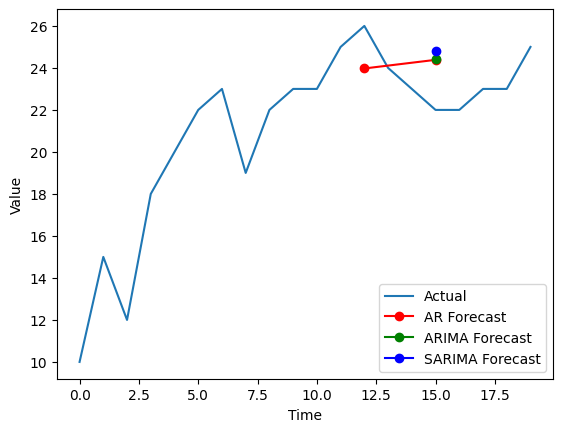

In [ ]:
# Plotting actual data
plt.plot(data_values, label='Actual')

# Plotting AR forecast
# plt.plot(data_values[1:3], ar_forecast, marker='o', color='red', label='AR Forecast')

# # Plotting ARIMA forecast
# plt.plot(data_values[1:2], arima_forecast, marker='o', color='green', label='ARIMA Forecast')

# # Plotting SARIMA forecast
# plt.plot(data_values[1:2], sarima_forecast, marker='o', color='blue', label='SARIMA Forecast')

plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.show()


# Применим к датасету

* https://www.kaggle.com/tartakovsky/pytorch-lightning-lstm-timeseries-clean-code
* https://keras.io/examples/timeseries/timeseries_weather_forecasting/

In [1]:
! pip install pytorch-lightning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.0/719.0 kB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 519.2/519.2 kB 36.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 55.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 12.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 14.8 MB/s eta 0:00:00


In [2]:
# Re-loads all imports every time the cell is ran. 
%load_ext autoreload
%autoreload 2

from time import time

import numpy as np
import pandas as pd
pd.options.display.float_format = '{:,.5f}'.format
from IPython.display import display

# Sklearn tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Neural Networks
import torch
import torch.nn as nn

from torch.utils.data import Dataset, DataLoader

import pytorch_lightning as pl
from pytorch_lightning import Trainer, seed_everything
from pytorch_lightning.loggers.csv_logs import CSVLogger

# Plotting
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('bmh')
mpl.rcParams['figure.figsize'] = 18, 8

In [3]:
! wget -nc "https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip"

--2023-06-06 08:36:55--  https://storage.googleapis.com/tensorflow/tf-keras-datasets/jena_climate_2009_2016.csv.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.174.128, 74.125.23.128, 74.125.203.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.174.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13568290 (13M) [application/zip]
Saving to: ‘jena_climate_2009_2016.csv.zip’

jena_climate_2009_2 100%[===================>]  12.94M  10.7MB/s    in 1.2s    

2023-06-06 08:36:57 (10.7 MB/s) - ‘jena_climate_2009_2016.csv.zip’ saved [13568290/13568290]



Так выглядит датасет

In [4]:
from zipfile import ZipFile
zip_file = ZipFile("jena_climate_2009_2016.csv.zip")
zip_file.extractall()
csv_path = "jena_climate_2009_2016.csv"

data = pd.read_csv(csv_path)
data = data.iloc[::200] # only each 200th point

data.head()

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52000,-8.02000,265.40000,-8.90000,93.30000,3.33000,3.11000,0.22000,1.94000,3.12000,"1,307.75000",1.03000,1.75000,152.30000
200,02.01.2009 09:30:00,998.53000,-3.90000,269.38000,-4.84000,93.10000,4.57000,4.26000,0.32000,2.66000,4.27000,"1,289.77000",1.42000,1.88000,180.80000
400,03.01.2009 18:50:00,995.37000,-3.87000,269.65000,-10.69000,58.83000,4.59000,2.70000,1.89000,1.69000,2.71000,"1,286.30000",1.73000,2.38000,243.60000
600,05.01.2009 04:10:00,985.44000,-1.77000,272.53000,-3.22000,89.70000,5.36000,4.81000,0.55000,3.04000,4.88000,"1,262.57000",3.11000,5.63000,260.90000
800,06.01.2009 13:30:00,996.63000,-11.09000,262.32000,-15.74000,68.25000,2.61000,1.78000,0.83000,1.11000,1.79000,"1,323.90000",1.10000,2.00000,19.56000


In [5]:
date_time_key = "Date Time"
data[date_time_key] = pd.to_datetime(data[date_time_key], infer_datetime_format=True)
data.set_index(date_time_key, inplace=True)
data.sort_index(inplace=True)
data.head()

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,
2009-01-01 00:10:00,996.52000,-8.02000,265.40000,-8.90000,93.30000,3.33000,3.11000,0.22000,1.94000,3.12000,"1,307.75000",1.03000,1.75000,152.30000
2009-01-02 22:50:00,982.91000,-2.63000,271.87000,-4.54000,86.60000,5.03000,4.36000,0.67000,2.76000,4.43000,"1,263.55000",4.10000,5.88000,46.33000
2009-01-03 17:30:00,983.27000,8.03000,282.55000,3.62000,73.60000,10.76000,7.92000,2.84000,5.03000,8.05000,"1,214.44000",2.22000,3.88000,181.90000
2009-01-04 06:50:00,994.16000,0.04000,273.65000,-1.43000,89.80000,6.12000,5.50000,0.62000,3.45000,5.53000,"1,265.03000",0.42000,0.75000,182.40000
2009-01-05 20:10:00,994.98000,14.02000,287.59000,10.56000,79.60000,16.03000,12.76000,3.27000,8.02000,12.82000,"1,201.09000",0.97000,2.25000,254.30000


In [6]:
data.shape

(2103, 14)

# Визуализация

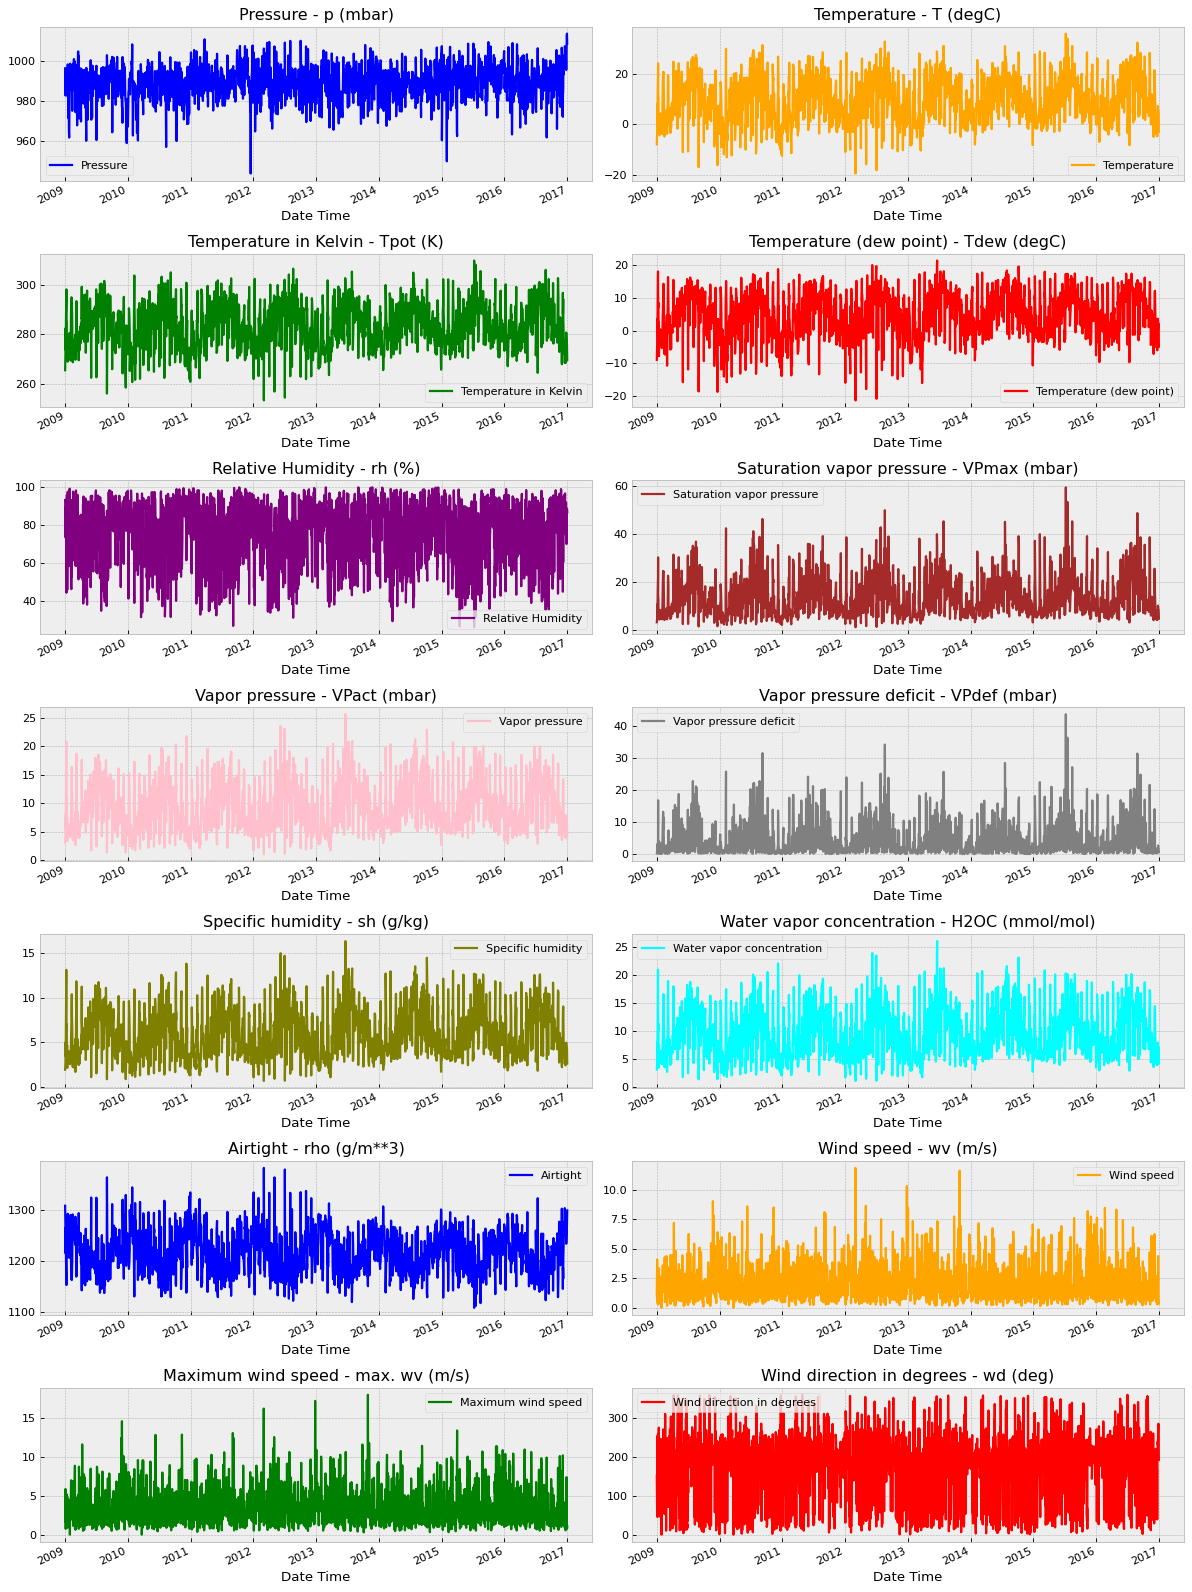

In [7]:
titles = [
    "Pressure",
    "Temperature",
    "Temperature in Kelvin",
    "Temperature (dew point)",
    "Relative Humidity",
    "Saturation vapor pressure",
    "Vapor pressure",
    "Vapor pressure deficit",
    "Specific humidity",
    "Water vapor concentration",
    "Airtight",
    "Wind speed",
    "Maximum wind speed",
    "Wind direction in degrees",
]

feature_keys = [
    "p (mbar)",
    "T (degC)",
    "Tpot (K)",
    "Tdew (degC)",
    "rh (%)",
    "VPmax (mbar)",
    "VPact (mbar)",
    "VPdef (mbar)",
    "sh (g/kg)",
    "H2OC (mmol/mol)",
    "rho (g/m**3)",
    "wv (m/s)",
    "max. wv (m/s)",
    "wd (deg)",
]

colors = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]



def show_raw_visualization(data):
    time_data = data.index
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 20), dpi=80, facecolor="w", edgecolor="k")
    for i in range(len(feature_keys)):
        key = feature_keys[i]
        c = colors[i % (len(colors))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(ax=axes[i // 2, i % 2], color=c, title="{} - {}".format(titles[i], key), rot=25,)
        ax.legend([titles[i]])
    plt.tight_layout()


show_raw_visualization(data)

In [8]:
data_name = "T (degC)"

1 Модель

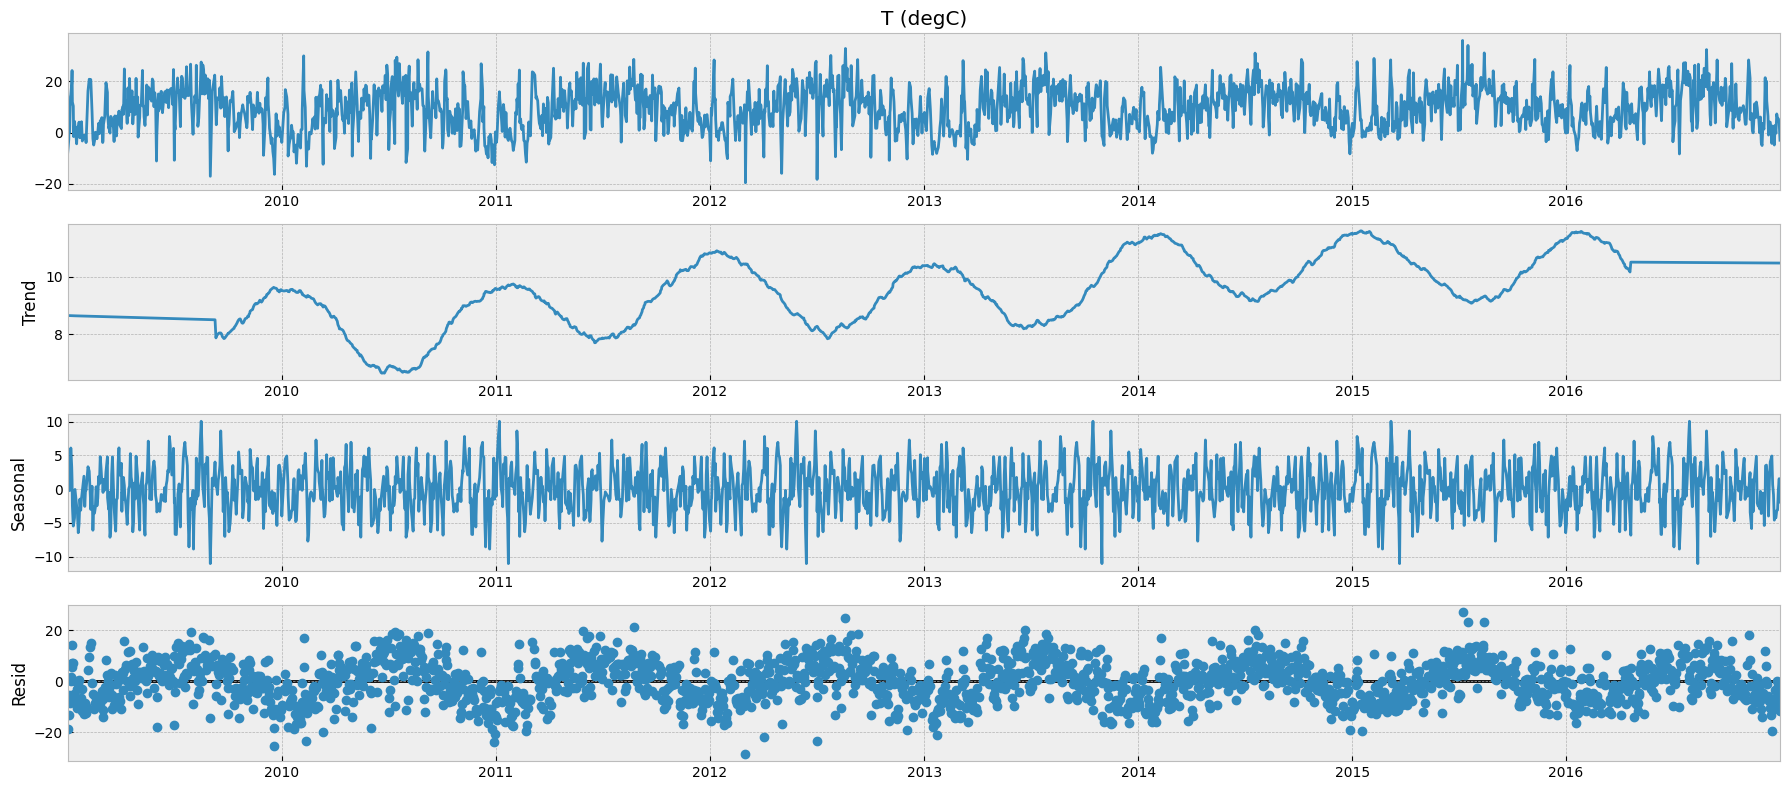

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data[data_name], model='additive', extrapolate_trend='freq', period=365)
decomposition.plot()
plt.show()

2 Модель

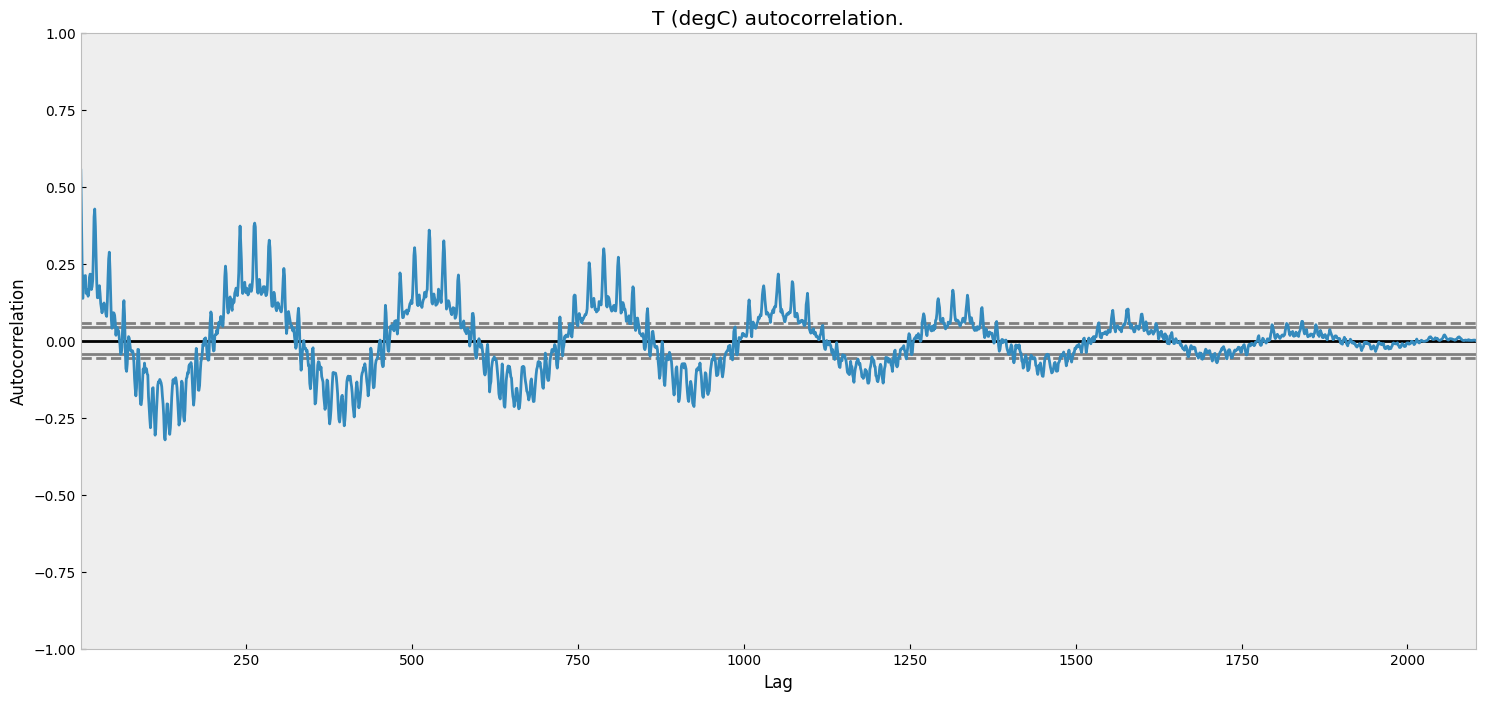

In [15]:
from pandas.plotting import lag_plot

import pandas as pd
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(data[data_name])
plt.title(f'{data_name} autocorrelation.')
plt.show()

In [16]:
print('autocorrelation coef:', data[data_name].autocorr())

autocorrelation coef: 0.5539874019535969


In [18]:
X = data[[data_name]].values

ss = StandardScaler()
X = ss.fit_transform(X)

Text(0.5, 1.0, 'Preprocessed "T (degC)" data.')

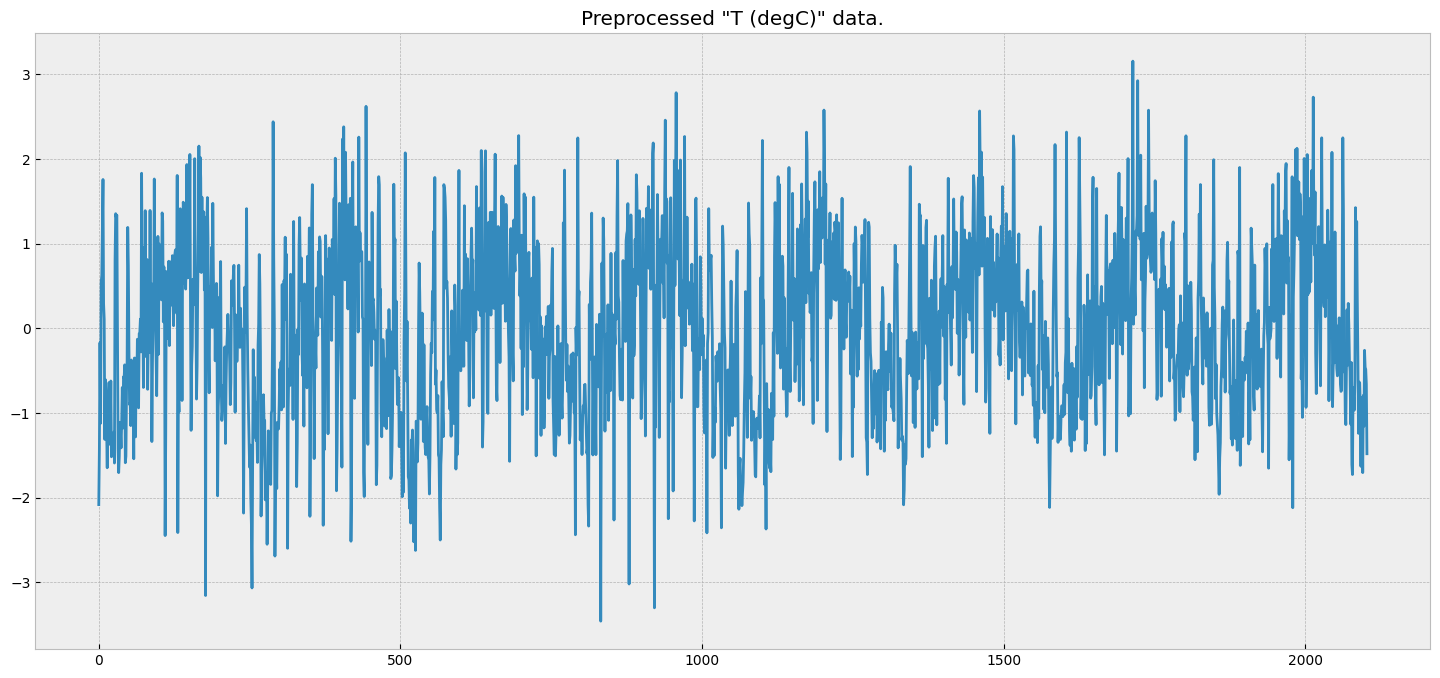

In [19]:
plt.plot(X)
plt.title(f'Preprocessed "{data_name}" data.')

Модифицируем разные регрессии

In [20]:
def AR_matrices(Y, k, m):
    X_AR = []
    Y_AR = []
    for i in range(len(Y)):
        
        if i < k-1: continue
        if i+m >= len(Y): break
        
        ax_ar = Y[i+1-k:i+1].reshape(-1, )
        X_AR.append(ax_ar)

        ay_ar = Y[i+m]#[0]
        Y_AR.append(ay_ar)

    return np.array(X_AR), np.array(Y_AR)

In [21]:
# prepare X and Y matrices
k = 1
X_AR, Y_AR = AR_matrices(X, k=k, m=1)
print('X shape:', X.shape)
print('X_AR shape: ', X_AR.shape)
print('Y_AR shape: ', Y_AR.shape)

X shape: (2103, 1)
X_AR shape:  (2102, 1)
Y_AR shape:  (2102, 1)


In [22]:
N = len(X)//2

X_AR_train, X_AR_test = X_AR[:N], X_AR[N:]
Y_AR_train, Y_AR_test = Y_AR[:N], Y_AR[N:]

Модель 3,4,5

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_AR_train, Y_AR_train)

In [24]:
Y_pred_test = model.predict(X_AR_test)

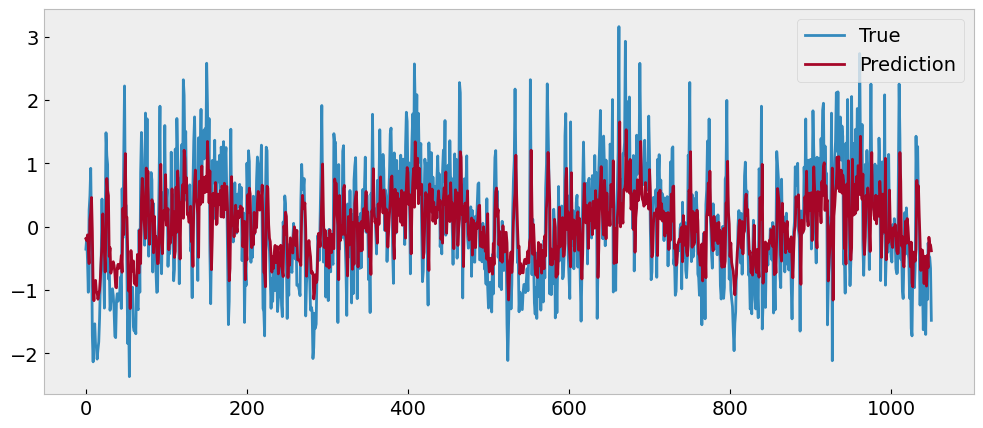

In [26]:
plt.figure(figsize=(12, 5))
plt.plot(Y_AR_test, label='True', alpha=1.)
plt.plot(Y_pred_test, label='Prediction', alpha=1.)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

Оценка метрики качества

In [28]:
from sklearn.metrics import mean_absolute_error as mse
print('MSE loss:', mse(Y_AR_test, Y_pred_test))

MSE loss: 0.6207792559153185


In [29]:
new_k = 30

# prepare X and Y matrices
X_AR_new_k, Y_AR_new_k = AR_matrices(X, k=new_k, m=1)

assert X_AR_new_k.shape == (2073, 30)
assert Y_AR_new_k.shape == (2073, 1)

print('X shape:', X.shape)
print('X_AR shape: ', X_AR_new_k.shape)
print('Y_AR shape: ', Y_AR_new_k.shape)

X_AR_train_new_k, X_AR_test_new_k = X_AR_new_k[:N], X_AR_new_k[N:]
Y_AR_train_new_k, Y_AR_test_new_k = Y_AR_new_k[:N], Y_AR_new_k[N:]

assert X_AR_train_new_k.shape == (1051, 30)
assert X_AR_test_new_k.shape == (1022, 30)
assert Y_AR_train_new_k.shape == (1051, 1)
assert Y_AR_test_new_k.shape == (1022, 1)

X shape: (2103, 1)
X_AR shape:  (2073, 30)
Y_AR shape:  (2073, 1)


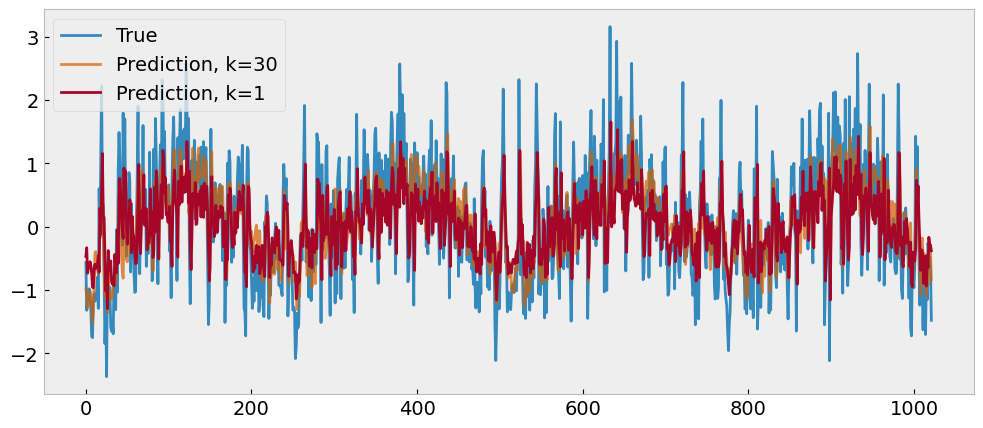

In [30]:
model = LinearRegression().fit(X_AR_train_new_k, Y_AR_train_new_k)

Y_pred_test_new_k = model.predict(X_AR_test_new_k)

assert Y_pred_test_new_k.shape == (1022, 1)

for i in range(Y_AR_test.shape[1]):
    plt.figure(figsize=(12, 5))
    plt.plot(Y_AR_test_new_k[:, i], label='True', alpha=1.)
    plt.plot(Y_pred_test_new_k[:, i], label=f'Prediction, k={new_k}', alpha=.7, color='C4')
    plt.plot(Y_pred_test[-Y_AR_test_new_k.shape[0]:], label='Prediction, k=1', alpha=1.)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.legend(loc='best', fontsize=14)
    plt.grid()
    plt.show()

Модели - LSTM

In [31]:
class TimeseriesDataset(Dataset):   
    '''
    Custom Dataset subclass. 
    Serves as input to DataLoader to transform X 
      into sequence data using rolling window. 
    DataLoader using this dataset will output batches 
      of `(batch_size, seq_len, n_features)` shape.
    Suitable as an input to RNNs. 
    '''
    def __init__(self, X: np.ndarray, y: np.ndarray, seq_len: int = 1):
        self.X = torch.tensor(X).float()
        self.y = torch.tensor(y).float()
        self.seq_len = seq_len

    def __len__(self):
        return self.X.__len__() - (self.seq_len-1)

    def __getitem__(self, index):
        return (self.X[index:index+self.seq_len], self.y[index+self.seq_len-1])

In [32]:
class DataModule(pl.LightningDataModule):
    '''
    LightningDataModule:
    https://pytorch-lightning.readthedocs.io/en/latest/extensions/datamodules.html
    '''
    def __init__(self, seq_len = 1, batch_size = 128, num_workers=0):
        super().__init__()
        self.seq_len = seq_len
        self.batch_size = batch_size
        self.num_workers = num_workers
        self.X_train = None
        self.y_train = None
        self.X_test = None
        self.X_test = None
        self.columns = None
        self.preprocessing = None

    def prepare_data(self):
        pass

    def setup(
        self,
        stage=None, 
        X_train=X_AR_train,
        y_train=Y_AR_train,
        X_test=X_AR_test,
        y_test=Y_AR_test,
    ):
        # Assign train/test datasets for use in dataloaders
        if stage == 'fit' or stage is None:
            self.X_train = X_train
            self.y_train = y_train.reshape((-1, 1))
            self.X_val = X_test
            self.y_val = y_test.reshape((-1, 1))
        if stage == 'test' or stage is None:
            self.X_test = X_test
            self.y_test = y_test.reshape((-1, 1))

    def train_dataloader(self):
        train_dataset = TimeseriesDataset(self.X_train, 
                                          self.y_train, 
                                          seq_len=self.seq_len)
        train_loader = DataLoader(train_dataset, 
                                  batch_size = self.batch_size, 
                                  shuffle = False, 
                                  num_workers = self.num_workers)
        
        return train_loader
    
    def val_dataloader(self):
        val_dataset = TimeseriesDataset(self.X_val, 
                                        self.y_val, 
                                        seq_len=self.seq_len)
        val_loader = DataLoader(val_dataset, 
                                batch_size = self.batch_size, 
                                shuffle = False, 
                                num_workers = self.num_workers)

        return val_loader

    def test_dataloader(self):
        test_dataset = TimeseriesDataset(self.X_test, 
                                         self.y_test, 
                                         seq_len=self.seq_len)
        test_loader = DataLoader(test_dataset, 
                                 batch_size = self.batch_size, 
                                 shuffle = False, 
                                 num_workers = self.num_workers)

        return test_loader

In [33]:
class LSTMRegressor(pl.LightningModule):
    '''
    Standard PyTorch Lightning module:
    https://pytorch-lightning.readthedocs.io/en/latest/lightning_module.html
    '''
    def __init__(self, 
                 n_features, 
                 hidden_size, 
                 seq_len, 
                 batch_size,
                 num_layers, 
                 dropout, 
                 learning_rate,
                 criterion):
        super(LSTMRegressor, self).__init__()
        self.n_features = n_features
        self.hidden_size = hidden_size
        self.seq_len = seq_len
        self.batch_size = batch_size
        self.num_layers = num_layers
        self.dropout = dropout
        self.criterion = criterion
        self.learning_rate = learning_rate

        self.lstm = nn.LSTM(input_size=n_features, 
                            hidden_size=hidden_size,
                            num_layers=num_layers, # number of LSTM-layers.
                            dropout=dropout, 
                            batch_first=True)
        self.linear = nn.Linear(hidden_size, 1)
        
    def forward(self, x):
        # lstm_out = (batch_size, seq_len, hidden_size)
        lstm_out, _ = self.lstm(x)
        y_pred = self.linear(lstm_out[:,-1])
        return y_pred
    
    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=self.learning_rate)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('train_loss', loss)
        return loss
    
    # since the dataset is rather small, we use test data for validation
    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('val_loss', loss)
        return loss

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.criterion(y_hat, y)
        self.log('test_loss', loss)
        return loss

In [34]:
p = dict(
    seq_len = 1,
    batch_size = 70, 
    criterion = nn.MSELoss(),
    max_epochs = 20,
    n_features = 1,
    hidden_size = 100,
    num_layers = 1,
    dropout = 0.2,
    learning_rate = 0.001,
)

In [35]:
model = LSTMRegressor(
    n_features = p['n_features'],
    hidden_size = p['hidden_size'],
    seq_len = p['seq_len'],
    batch_size = p['batch_size'],
    criterion = p['criterion'],
    num_layers = p['num_layers'],
    dropout = p['dropout'],
    learning_rate = p['learning_rate']
)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [39]:
seed_everything(1)

csv_logger = CSVLogger('./', name='lstm', version='0'),

trainer = Trainer(
    max_epochs=p['max_epochs'],
    accelerator="auto"
)

INFO:lightning_fabric.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [40]:
dm = DataModule(
    seq_len = p['seq_len'],
    batch_size = p['batch_size']
)

In [41]:
trainer.fit(model, dm)
trainer.test(model, datamodule=dm)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | lstm      | LSTM    | 41.2 K
2 | linear    | Linear  | 101   
--------------------------------------
41.3 K    Trainable params
0         Non-trainable params
41.3 K    Total params
0.165     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (16) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.6046491265296936     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.6046491265296936}]

Визуализация обучения нейронной сети

In [43]:
from torch.autograd import Variable 

X_test_lstm = Variable(torch.tensor(X_AR_test, dtype=torch.float).view(-1, 1, 1))
X_test_lstm.shape

torch.Size([1051, 1, 1])

In [44]:
Y_pred_test_lstm = model(X_test_lstm).detach().numpy()

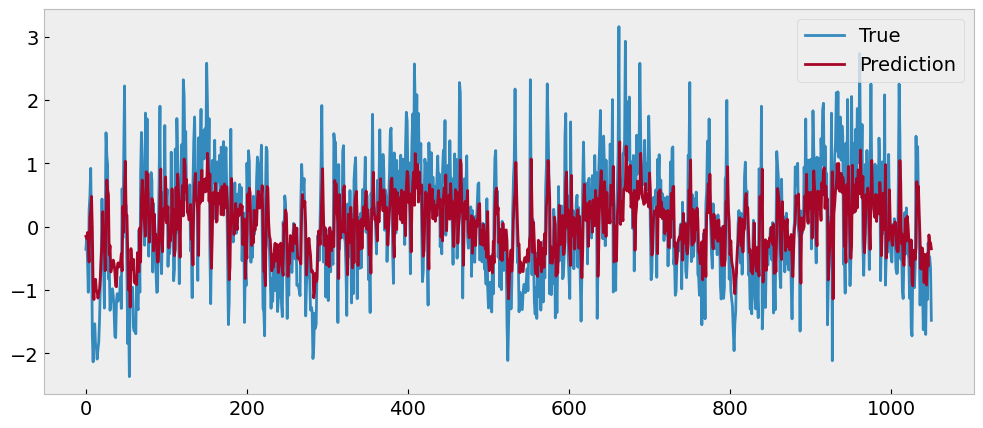

In [46]:
plt.figure(figsize=(12, 5))
plt.plot(Y_AR_test, label='True', alpha=1.)
plt.plot(Y_pred_test_lstm, label='Prediction', alpha=1.)
plt.xticks(size=14)
plt.yticks(size=14)
plt.legend(loc='best', fontsize=14)
plt.grid()
plt.show()

In [47]:
print('MSE loss:', mse(Y_AR_test, Y_pred_test_lstm))

MSE loss: 0.6202248958543891


In [48]:
seq_len = 20

p = dict(
    seq_len = seq_len,# your code where
    batch_size = 50, 
    criterion = nn.MSELoss(),
    max_epochs = 20,
    n_features = 1,
    hidden_size = 20,
    num_layers = 1,
    dropout = 0.2,
    learning_rate = 0.001,
)

In [49]:
dm = DataModule(
    seq_len = p['seq_len'],
    batch_size = p['batch_size']
)

In [50]:
model = LSTMRegressor(
    n_features = p['n_features'],
    hidden_size = p['hidden_size'],
    seq_len = p['seq_len'],
    batch_size = p['batch_size'],
    criterion = p['criterion'],
    num_layers = p['num_layers'],
    dropout = p['dropout'],
    learning_rate = p['learning_rate']
)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.2 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "


In [51]:
seed_everything(1)

csv_logger = CSVLogger('./', name='lstm', version='0'),

trainer = Trainer(
    max_epochs=p['max_epochs'], accelerator="auto"
)

INFO:lightning_fabric.utilities.seed:Global seed set to 1
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


In [52]:
trainer.fit(model, dm)
trainer.test(model, datamodule=dm)

INFO:pytorch_lightning.callbacks.model_summary:
  | Name      | Type    | Params
--------------------------------------
0 | criterion | MSELoss | 0     
1 | lstm      | LSTM    | 1.8 K 
2 | linear    | Linear  | 21    
--------------------------------------
1.9 K     Trainable params
0         Non-trainable params
1.9 K     Total params
0.007     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/pytorch_lightning/loops/fit_loop.py:280: PossibleUserWarning: The number of training batches (21) is smaller than the logging interval Trainer(log_every_n_steps=50). Set a lower value for log_every_n_steps if you want to see logs for the training epoch.
  rank_zero_warn(


Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=20` reached.


Testing: 0it [00:00, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_loss         │    0.5605015158653259     │
└───────────────────────────┴───────────────────────────┘

[{'test_loss': 0.5605015158653259}]

In [53]:
X_AR_test_new_k_lstm = Variable(torch.tensor(X_AR_test_new_k, dtype=torch.float)[:, :, None]) 
assert X_AR_test_new_k_lstm.shape == torch.Size([1022, 30, 1])

In [54]:
Y_pred_test_new_k_lstm = model(X_AR_test_new_k_lstm).detach().numpy()

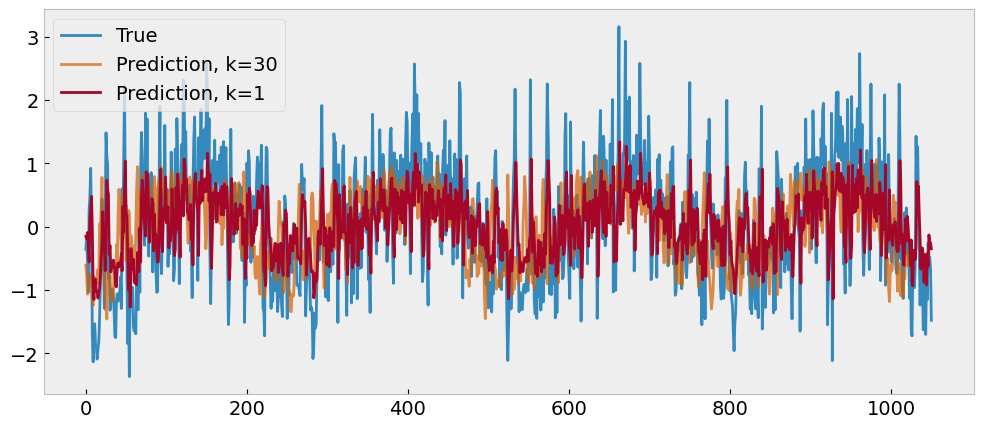

In [56]:
for i in range(Y_AR_test.shape[1]):
    plt.figure(figsize=(12, 5))
    plt.plot(Y_AR_test, label='True', alpha=1.)
    plt.plot(Y_pred_test_new_k_lstm, label=f'Prediction, k={new_k}', alpha=.7, color='C4')
    plt.plot(Y_pred_test_lstm, label='Prediction, k=1', alpha=1.)
    plt.xticks(size=14)
    plt.yticks(size=14)
    plt.legend(loc='best', fontsize=14)
    plt.grid()
    plt.show()

In [57]:
print('MSE loss k=1:', mse(Y_pred_test_lstm, Y_AR_test))
print(f'MSE loss k={seq_len}:', mse(Y_pred_test_new_k_lstm, Y_AR_test_new_k))

MSE loss k=1: 0.6202248958543891
MSE loss k=20: 0.5859107638703936


# Вывод

Лучше всего результат показывает реккурентная сеть LSTM